## Ejemplo de Regresión Lineal Simple

Se realiza un experimento para estudiar la relación entre la altura de la concha X y la longitud de la concha Y  (cada  una  medida  en  milímetros) del  Patelloida  pygmaea,  una  lapa  pegada  a  las  rocas  y  conchas  a lo  largo  de  las  costas  protegidas  en  el  área  Indo-Pacífica. Se  obtienen  los  siguientes datos.

<img src="figs/rlsimple_tabla.png">

In [1]:
x<- c(0.9, 1.5, 1.6, 1.7, 1.7, 1.8, 1.8, 1.9 ,1.9, 1.9, 2.0, 2.0, 2.0, 2.1,
      2.1, 2.1, 2.1, 2.2, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.7)
y<-c(3.1, 3.6, 4.3, 4.7, 5.5, 5.7, 5.2,5.0,5.3, 5.7, 4.4, 5.2, 5.3, 5.4,
     5.6, 5.7, 5.8, 5.2, 5.3, 5.6, 5.8, 5.8, 6.2, 6.3, 6.4, 6.4, 6.3, 6.3)


Dibujamos los datos

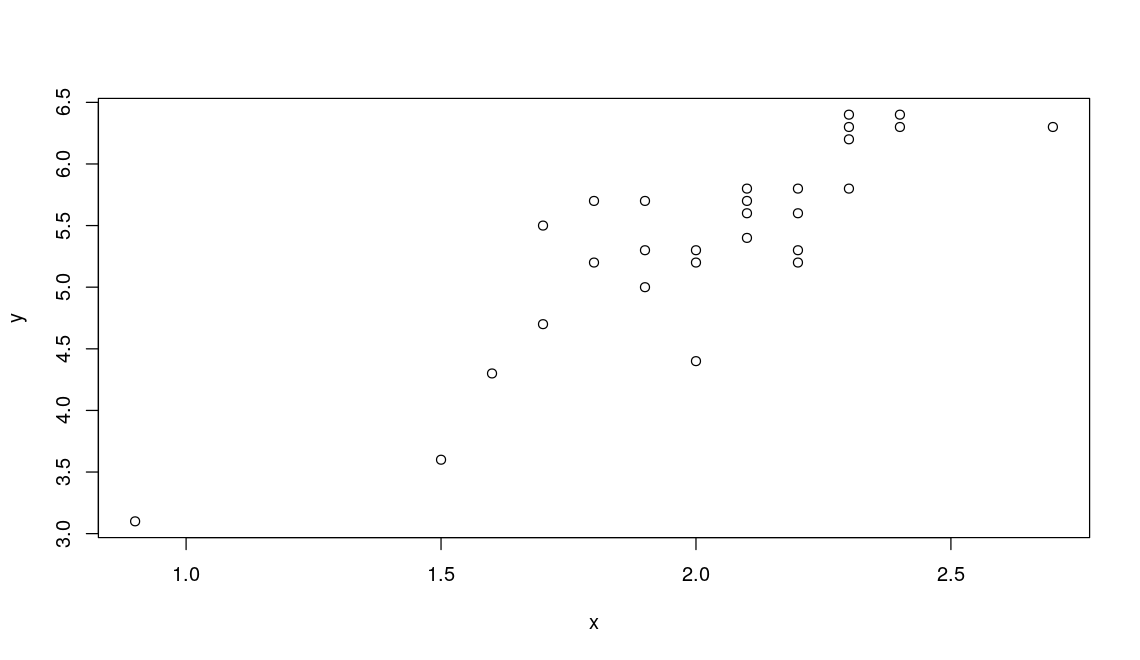

In [2]:
# este comando es para ajustar el tamaño de los plots
options(repr.plot.width=9.5, repr.plot.height=5.5)

plot(x,y)

Hacemos la estimación de los parámetros de la recta de regresión
<img src="figs/rlsimple_cuentas.png">

Dibujamos los datos y la recta de regresión obtenida

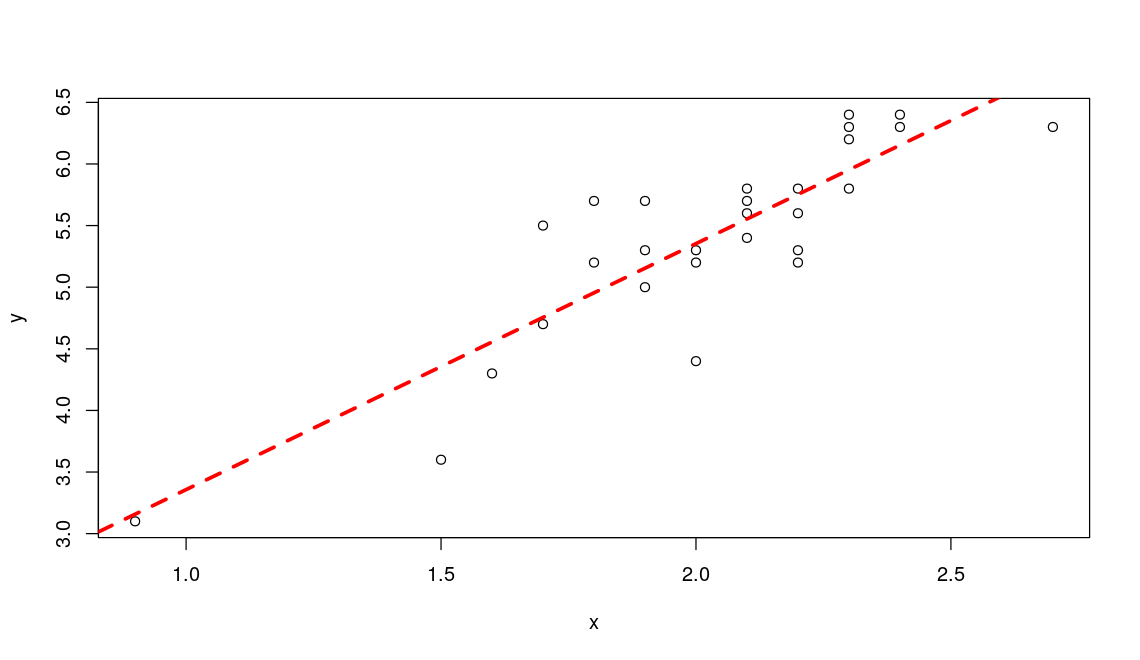

In [3]:
plot(x,y)

abline(1.3611,1.9963, col= "red", lty=2, lwd=3)            

Parece que la regresión lineal se aproxima bien a los datos. Calculamos el coeficiente de corelación Lineal de Pearson

<img src="figs/rlsimple_cuentas2.png">

Estamos por  tanto  ante  una  correlación  lineal  positiva  moderada  entre  la  altura  y  la  longitud  de  la  concha. Vamos a usar R a continuación para hacer el análisis

In [4]:
ej1<-lm(y~x)
summary(ej1)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95365 -0.15374 -0.00347  0.24691  0.74561 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3611     0.4681   2.907  0.00736 ** 
x             1.9963     0.2284   8.742 3.22e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4128 on 26 degrees of freedom
Multiple R-squared:  0.7461,	Adjusted R-squared:  0.7364 
F-statistic: 76.42 on 1 and 26 DF,  p-value: 3.223e-09


De estas tablas deducimos que la recta de regresión es $\hat y_i= 1.3611 + 1.9963 x_i$.

Si hacemos el siguiente contraste de hipótesis

  $H_0:\ \beta_1=0$

  $H_1:\ \beta_1\neq 0$
  
Observamos que el  valor  del  estadístico  es  8.742 y  el p-valor es muy pequeño (menos que 0.0001). Por  tanto  se  rechaza  la  hipótesis  nula  y  podemos  decir  que  la  influencia  de  la  altura  en  la  longitud  de  la  lapa  es  significativa.

Por otro lado, $R^2 = 0.8642 = 0.746$ y por tanto, la altura de la lapa explica el 75% de la variabilidad existente en la longitud de la lapa.

Podemos calcular intervalos de confianza de los parámetros y la tabla ANOVA

In [5]:
confint(ej1)
anova(ej1)

,2.5 %,97.5 %
(Intercept),0.3987912,2.323378
x,1.5268920,2.465675


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,13.020045,13.0200451,76.42255,3.222847e-09
Residuals,26,4.429598,0.1703691,NA,NA


Los intervalos de confianza son:

$I_{\beta_0}^{0.95}=(0.3987912,	2.323378)$

$I_{\beta_1}^{0.95}=(1.5268920,	2.465675)$

A continuación dibujamos los valores de observados y los predichos

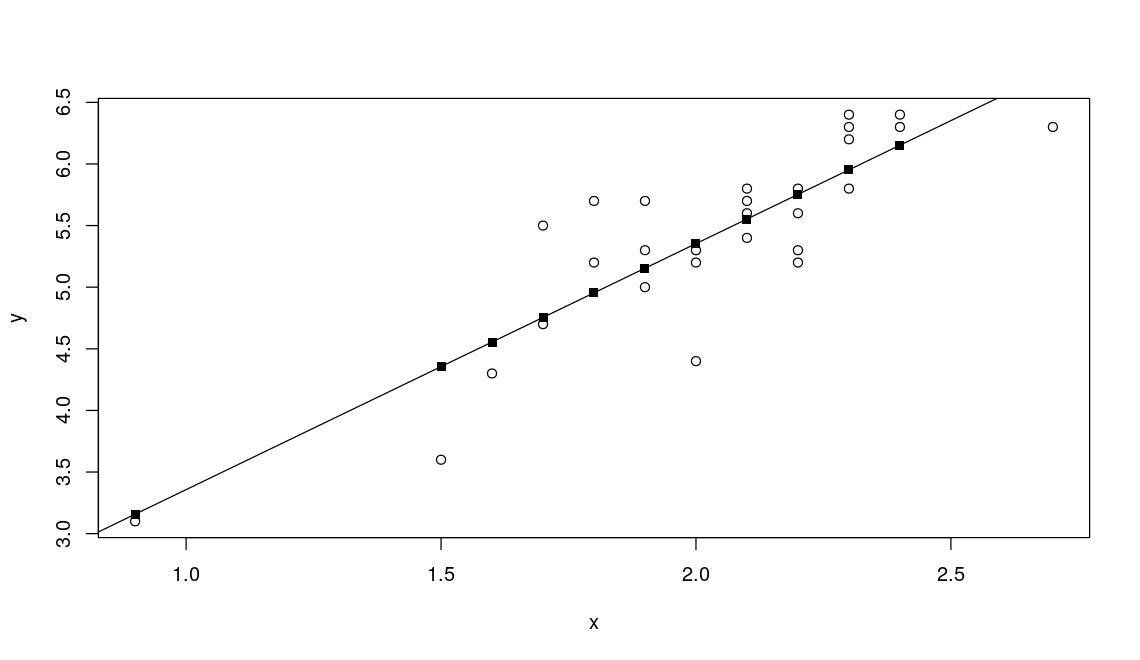

In [9]:
yhat <- 1.3611 + 1.9963 *x
plot(x,y)
points(x,yhat,pch=15)
abline(1.3611,1.9963)

A continuación dibujamos los residuos (la diferencia entre los valores de observados y los predichos)

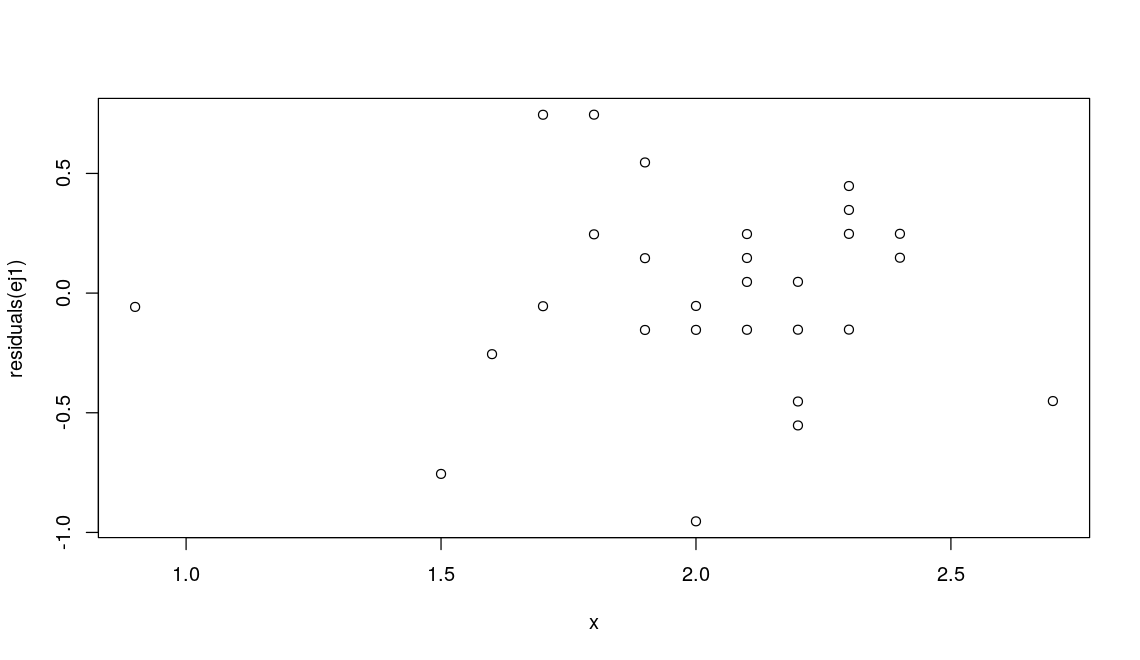

In [7]:
plot(x,residuals(ej1))

En principio estos gráficos no indican ninguna desviación de las hipótesis de normalidad y varianza constante (que son las hipótesis necesarias para realizar modelos de regresión lineal). Sin  embargo, realizamos  un  contraste  de  hipótesis  de  normalidad  para  los  residuos  estandarizados por medio de la prueba K-S.

In [8]:
res.estan.ej1<-residuals(ej1)/(summary(ej1)$sig*sqrt(1-influence(ej1)$hat)) 
shapiro.test(res.estan.ej1)
ks.test(res.estan.ej1,pnorm,mean(res.estan.ej1),sd(res.estan.ej1))


	Shapiro-Wilk normality test

data:  res.estan.ej1
W = 0.97427, p-value = 0.6983



	One-sample Kolmogorov-Smirnov test

data:  res.estan.ej1
D = 0.14142, p-value = 0.5813
alternative hypothesis: two-sided


Vemos  que  no  se  rechaza  la  hipótesis  de  normalidad  (p=  0.5813).  Además,  contrastes  más  exigentes específicos de bondad de ajuste a la distribución normal tampoco rechazan la hipótesis de normalidad de los residuos (Shapiro-Wilks: p   = 0.709). Por tanto, no hay razones para suponer que hay violación de las hipótesis de normalidad.En  cuanto  a  la  hipótesis  de  independencia,  confiamos  en  que  la  muestra  de  datos  provenga  de  un  muestreo aleatorio simple.